# Robni problemi lastnih vrednosti

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
import time

import tridiagonal as tdg
import bvp
import bvp_og as rp
import diffeq as deq

from matplotlib import cm

## Neskončna potencialna jama

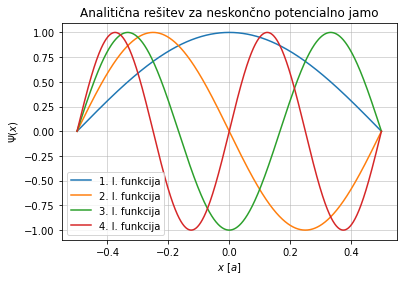

In [2]:
def lastna_inf(x, n):
    a = x[-1] - x[0]
    return np.sin(n * np.pi * (x / a + 1. / 2.))
    #return (2 / a)**0.5 * np.sin(n * np.pi * (x / a + 1. / 2.))

x = np.linspace(-0.5, 0.5, 1000)

for n in range(1, 5):
    plt.plot(x, lastna_inf(x, n), label=f'{n}. l. funkcija')

plt.title('Analitična rešitev za neskončno potencialno jamo')
plt.xlabel('$x$ [$a$]')
plt.ylabel('$\Psi(x)$')
plt.legend()
plt.grid(alpha=0.5, linewidth=1)
plt.savefig('grafi/analiticne-resitve.pdf')
plt.show()

In [3]:
def ipw(y, x):
    return np.array((y[1], -e * y[0]))

### Lastne vrednosti
Najlažje je pomoje, če grem čez nekej vrednosti energije pa gledam kdaj fukcija pride tko da se na koncu ujema z R.P. Lastna vrednost bo tam, kjer seka $\Delta\psi=0$. najprej bom tako za lep graf potem pa še z bisekcijo za bolj natančne številke

In [4]:
enrg = np.linspace(0, 200, 5000)

def err_inf_r(energf, x):
    e = energf
    prev, z2 = shoot(ipw, 1., 0., 0., 1., x, 1e-4)
    return z2


# potencialna jama velikosti [xs, xf]
xi = -0.5
xf = 0.5
x = np.linspace(xi, xf, 500)
xr = np.linspace(0, xf, 500)
psi0 = [0., 1.]
acc = 1e-4

err = np.zeros(len(enrg))
eigval = []

for i in range(len(enrg)):
    e = enrg[i]
    end = deq.rku4(ipw, psi0, x)[::, 0]
    err[i] = end[-1]

    if err[i] * err[i-1] < 0:
        eigval.append(e)

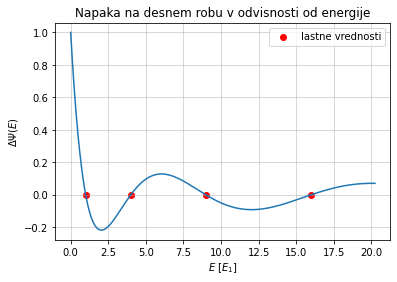

Lastne vrednosti: [9.881976395279056, 39.4878975795159, 88.85777155431087, 157.9515903180636]


In [5]:
plt.plot(enrg/eigval[0], err)
plt.scatter(eigval/eigval[0], np.zeros(len(eigval)), color='red', label='lastne vrednosti')

plt.title('Napaka na desnem robu v odvisnosti od energije')
plt.xlabel('$E$ [$E_1$]')
plt.ylabel('$\Delta\Psi(E)$')
plt.legend()
plt.grid(alpha=0.5, linewidth=1)
plt.savefig('grafi/eigenval.pdf')
plt.show()

print(f'Lastne vrednosti: {eigval}')

tole je ok ampak upgrade -->> iskanje vrednosti z bisekcijo

In [6]:
def bisekcija(a, b, acc=1e-4):
    x = np.linspace(xi, xf, 10000)
    psi0 = np.array([0., 1.])
    
    while abs(a - b) > acc:
        c = (a + b) / 2.
        
        e = a
        psi_a = deq.rku4(ipw, psi0, x)[::, 0]
        psi_a = psi_a / np.max(np.abs(psi_a))
        e = c
        psi_c = deq.rku4(ipw, psi0, x)[::, 0]
        psi_c = psi_c / np.max(np.abs(psi_c))
        
        err_a = psi_a[-1]
        err_c = psi_c[-1]
        print(err_a, err_c)

        if err_a * err_c < 0:
            b = c
        else:
            a = c
        
    return (a + b) / 2.


vrednosti_bis = np.zeros(len(eigval))

# for i in range(len(eigval)):
#    a = eigval[i] - 1.4
#    b = eigval[i] + 1.5
#
#    vrednosti_bis[i] = bisekcija(a, b, 1e-4)
#
# print(vrednosti_bis-eigval)

0.9999876584566432 0.9999876584566432
0.9999876584566432 0.9999876584566432
0.9999876584566432 0.9999876584566432
0.9999876584566432 0.9999876584566432
0.9999876584566432 0.9999876584566432
0.9999876584566432 0.9999876584566432
0.9999876584566432 0.9999876584566432
0.9999876584566432 0.9999876584566432
0.9999876584566432 0.9999876584566432
0.9999876584566432 0.9999876584566432
0.9999876584566432 0.9999876584566432
0.9999876584566432 0.9999876584566432
0.9999876584566432 0.9999876584566432
0.9999876584566432 0.9999876584566432
0.9999876584566432 0.9999876584566432
0.9999876584566432 0.9999876584566432
0.9999876584566432 0.9999876584566432
0.9999876584566432 0.9999876584566432
0.9999876584566432 0.9999876584566432
0.9999876584566432 0.9999876584566432
0.9999876584566432 0.9999876584566432
0.9999876584566432 0.9999876584566432
0.9999876584566432 0.9999876584566432
0.9999876584566432 0.9999876584566432
0.9999876584566432 0.9999876584566432
0.9999876584566432 0.9999876584566432
0.9999876584

 1: z =  1.000e+00, error = -3.171e-01
 2: z =  3.094e-03, error =  1.161e-15
1.0
 1: z =  1.000e+00, error =  1.000e+00
 2: z = -1.666e+04, error =  1.068e-11
1.9989875980115657
 1: z =  1.000e+00, error =  1.053e-01
 2: z =  7.834e-03, error = -9.541e-16
2.9986501686605753
 1: z =  1.000e+00, error = -1.000e+00
 2: z = -1.666e+04, error = -2.627e-11
3.9979751960231313


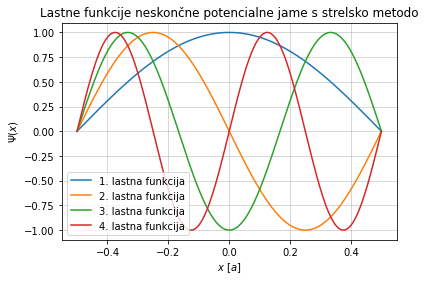

In [6]:
def halfshotipw_r(en, x): # Desna stran jame
    e = en
    return rp.shoot(ipw, 1., 0., 0., 1., x, 1e-4)

def halfshotipw_l(en, x): # Leva stran jame
    e = en
    return rp.shoot(ipw, 0., 1., 0., 1., x, 1e-4)

xr = np.linspace(0, xf, 500)

x = np.zeros(2 * len(xr))
y = np.zeros((len(eigval), 2 * len(xr)))
x[:len(xr)] = -xr[::-1]
x[len(xr):] = xr
xl = -xr[::-1]

for i in range(len(eigval)):
    e = eigval[i]
    yr = halfshotipw_r(e, xr)
    yr = yr / np.max(np.abs(yr))

    if yr[0] > 0.2:
        y[i, :len(xr)] = yr[::-1]
        y[i, len(xr):] = yr
    else:
        y[i, :len(xr)] = -yr[::-1]
        y[i, len(xr):] = yr

    if y[i, 1] < 0:
        y[i] = -y[i]


    plt.plot(x, y[i], label=f'{i+1}. lastna funkcija')

    print(np.sqrt(eigval[i]/eigval[0]))
    
plt.title('Lastne funkcije neskončne potencialne jame s strelsko metodo')
plt.xlabel('$x$ [$a$]')
plt.ylabel('$\Psi(x)$')
plt.legend()
plt.grid(alpha=0.5, linewidth=1)
plt.savefig('grafi/eigfunc-sh.pdf')
plt.show()

### Strelska metoda

 0: z =  0.000e+00, error =  0.000e+00
 1: z =  1.000e+00, error =  6.262e-04
 2: z =  0.000e+00, error =  0.000e+00


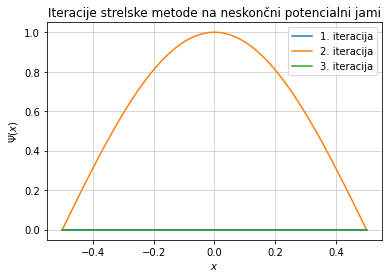

In [8]:
e = eigval[0]
x = np.linspace(xi, xf, 1000)

psi = bvp.shoot(ipw, 0., 0., 0., 1., x, 1e-4)

for i in range(len(psi)):
    if np.max(np.abs(psi[i])) != 0.:
        psi[i] = psi[i] / np.max(np.abs(psi[i]))
    plt.plot(x, psi[i], label=f'{i+1}. iteracija')

plt.title('Iteracije strelske metode na neskončni potencialni jami')
plt.xlabel('$x$')
plt.ylabel('$\Psi(x)$')
plt.legend()
plt.grid(alpha=0.5, linewidth=1)
plt.savefig('grafi/shootingto0.pdf')
plt.show()

 1: z =  1.000e+00, error = -3.171e-01
 2: z =  3.094e-03, error =  1.161e-15
 1: z =  1.000e+00, error = -3.077e-01
 2: z =  2.794e-02, error =  3.608e-16
 1: z =  1.000e+00, error = -2.983e-01
 2: z =  5.291e-02, error = -4.042e-16
 1: z =  1.000e+00, error = -2.889e-01
 2: z =  7.801e-02, error =  3.669e-16
 1: z =  1.000e+00, error = -2.796e-01
 2: z =  1.032e-01, error =  1.258e-16
 1: z =  1.000e+00, error = -2.703e-01
 2: z =  1.286e-01, error = -1.670e-16
 1: z =  1.000e+00, error = -2.611e-01
 2: z =  1.541e-01, error = -3.773e-17
 1: z =  1.000e+00, error = -2.519e-01
 2: z =  1.797e-01, error =  7.325e-16
 1: z =  1.000e+00, error = -2.427e-01
 2: z =  2.054e-01, error =  2.316e-16
 1: z =  1.000e+00, error = -2.336e-01
 2: z =  2.313e-01, error =  6.692e-16
 1: z =  1.000e+00, error = -2.245e-01
 2: z =  2.573e-01, error =  1.194e-15
 1: z =  1.000e+00, error = -2.155e-01
 2: z =  2.835e-01, error = -2.099e-16
 1: z =  1.000e+00, error = -2.065e-01
 2: z =  3.098e-01, error

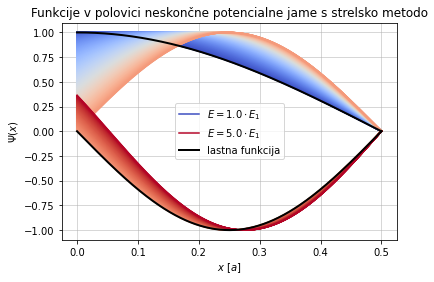

In [16]:
def halfshotipw_r(en, x): # Desna stran jame
    e = en
    return rp.shoot(ipw, 1., 0., 0., 1., x, 1e-4)

def halfshotipw_l(en, x): # Leva stran jame
    e = en
    return rp.shoot(ipw, 0., 1., 0., 1., x, 1e-4)

xr = np.linspace(0, xf, 500)

enspace = np.linspace(eigval[0], 5*eigval[0], 400)

colors = cm.coolwarm(np.linspace(0, 1, len(enspace)))
x = np.zeros(2 * len(xr))
y = np.zeros((len(enspace), 2 * len(xr)))
x[:len(xr)] = -xr[::-1]
x[len(xr):] = xr
xl = -xr[::-1]

for i in range(len(enspace)):
    e = enspace[i]
    yr = halfshotipw_r(e, xr)
    yr = yr / np.max(np.abs(yr))

    #yl = halfshotipw_l(e, xl)
    #yl = yl / np.max(np.abs(yl))

    # Rabm ločitev za sode in lihe funkcije kako se bojo prezrcalle na negativno polovico jame
    if 1: #yr[0] > 0.2:
        y[i, :len(xr)] = yr[::-1]
        y[i, len(xr):] = yr
    else:
        y[i, :len(xr)] = -yr[::-1]
        y[i, len(xr):] = yr

    #y[i, :len(xr)] = yl
    #y[i, len(xr):] = yr

    if i == 0 or i == len(enspace)-1:
        plt.plot(xr, yr, color=colors[i], label=f'$E={round(e/eigval[0], 2)}\cdot E_1$')
    else:
        plt.plot(xr, yr, color=colors[i])


plt.plot(xr, lastna_inf(x, 1)[len(xr):], color='black', linewidth=2, label='lastna funkcija')
plt.plot(xr, lastna_inf(x, 2)[len(xr):], color='black', linewidth=2)
#plt.plot(xr, -lastna_inf(x, 3)[len(xr):], color='black', linewidth=2)
#plt.plot(xr, -lastna_inf(x, 4)[len(xr):], color='black', linewidth=2)

plt.title('Funkcije v polovici neskončne potencialne jame s strelsko metodo')
#plt.ylim(-1.1, 1.1)
plt.xlabel('$x$ [$a$]')
plt.ylabel('$\Psi(x)$')
plt.legend()
plt.grid(alpha=0.5, linewidth=1)
plt.savefig('grafi/iwp-halfshootr-'+str(round(enspace[-1], 0))+'.pdf')
plt.show()

Poskus sode razširitve na celotno območje jame. NE DELA DOBR

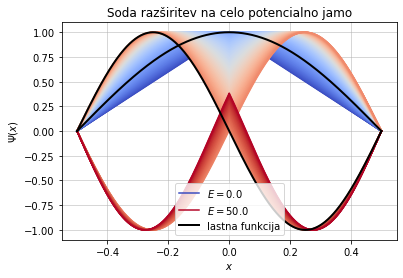

In [10]:
for i in range(len(y)):
    e = enspace[i]
    if i == 0 or i == len(y)-1:
        plt.plot(x, y[i], color=colors[i], label=f'$E={e}$')
    else:    
        plt.plot(x, y[i], color=colors[i])

plt.plot(x, lastna_inf(x, 1), color='black', linewidth=2, label='lastna funkcija')
plt.plot(x, lastna_inf(x, 2), color='black', linewidth=2)
#plt.plot(x, -lastna_inf(x, 3), color='black', linewidth=2)
#plt.plot(x, -lastna_inf(x, 4), color='black', linewidth=2)


plt.title('Soda razširitev na celo potencialno jamo')
plt.xlabel('$x$')
plt.ylabel('$\Psi(x)$')
plt.legend()
plt.grid(alpha=0.5, linewidth=1)
plt.savefig('grafi/iwp-shoot-ef-'+str(round(enspace[-1], 0))+'.pdf')
plt.show()

 1: z =  1.000e+00, error = -3.171e-01
 2: z =  3.094e-03, error =  1.161e-15
1.0
 1: z =  1.000e+00, error =  1.000e+00
 2: z = -1.666e+04, error =  1.068e-11
1.9989875980115657
 1: z =  1.000e+00, error =  1.053e-01
 2: z =  7.834e-03, error = -9.541e-16
2.9986501686605753
 1: z =  1.000e+00, error = -1.000e+00
 2: z = -1.666e+04, error = -2.627e-11
3.9979751960231313


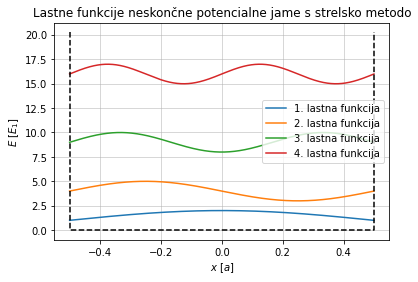

In [13]:
jama = np.array([[xi, xi, xf, xf], [200/eigval[0], 0, 0, 200/eigval[0]]])


xr = np.linspace(0, xf, 500)

x = np.zeros(2 * len(xr))
y = np.zeros((len(eigval), 2 * len(xr)))
x[:len(xr)] = -xr[::-1]
x[len(xr):] = xr
xl = -xr[::-1]

for i in range(len(eigval)):
    e = eigval[i]
    yr = halfshotipw_r(e, xr)
    yr = yr / np.max(np.abs(yr))

    if yr[0] > 0.2:
        y[i, :len(xr)] = yr[::-1]
        y[i, len(xr):] = yr
    else:
        y[i, :len(xr)] = -yr[::-1]
        y[i, len(xr):] = yr

    if y[i, 1] < 0:
        y[i] = -y[i]


    plt.plot(x, y[i]+eigval[i]/eigval[0], label=f'{i+1}. lastna funkcija')

    print(np.sqrt(eigval[i]/eigval[0]))
    
plt.plot(jama[0], jama[1], color='black', linestyle='dashed')
plt.title('Lastne funkcije neskončne potencialne jame s strelsko metodo')
plt.xlabel('$x$ [$a$]')
plt.ylabel('$E$ [$E_1$]')
plt.legend()
plt.grid(alpha=0.5, linewidth=1)
plt.savefig('grafi/vjami-eigfunc-sh.pdf')
plt.show()

### Diferenčna metoda

In [8]:
def difmat(N):
    A = np.zeros((N, N))
    for i in range(N):
        for j in range(N):
            if i == j:
                A[i, j] = -2
            elif abs(i - j) == 1:
                A[i, j] = 1
    return A

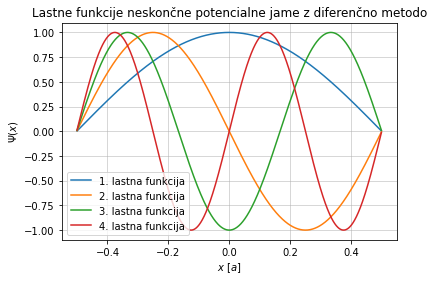

In [9]:
xi = -0.5
xf = 0.5
N = 1000
funcs = 4

x = np.linspace(xi, xf, N)
A = difmat(N)

a = np.diagonal(A, offset=0)
c = np.diagonal(A, offset=1)
d = np.diagonal(A, offset=-1)
b = np.zeros(N)

val, vec = np.linalg.eig(A)
vec = vec[:, np.argsort(val)]

psi = np.zeros((funcs, N))
for i in range(funcs):
    psi[i] = vec[:, -1-i]
    psi[i] = psi[i] / np.max(np.abs(psi[i]))
    
    if psi[i, 1] < 0:
        psi[i] = -psi[i]

    plt.plot(x, psi[i], label=f'{i+1}. lastna funkcija')

plt.title('Lastne funkcije neskončne potencialne jame z diferenčno metodo')
plt.xlabel('$x$ [$a$]')
plt.ylabel('$\Psi(x)$')
plt.legend()
plt.grid(alpha=0.5, linewidth=1)
plt.savefig('grafi/eigfunc-dif-'+str(N)+'.pdf')
plt.show()

#### Napake diferenčne metode

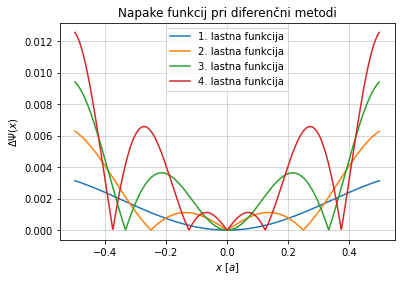

In [10]:
ana = np.zeros((funcs, N))
for i in range(funcs):
    ana[i] = lastna_inf(x, i+1)

for i in range(funcs):
    plt.plot(x, abs(ana[i]-psi[i]), label=f'{i+1}. lastna funkcija')

plt.title('Napake funkcij pri diferenčni metodi')
plt.xlabel('$x$ [$a$]')
plt.ylabel('$\Delta\Psi(x)$')
plt.legend()
plt.grid(alpha=0.5, linewidth=1)
plt.savefig('grafi/dif-err-'+str(N)+'.pdf')
plt.show()

#### Napake in časovna odvisnost

In [14]:
nspace = 10 * np.arange(5, 110)

l = len(nspace)
psi_err = np.zeros((2, l))
timer = np.zeros(l)

for i in range(l):
    N = nspace[i]
    x = np.linspace(xi, xf, N)
    ana = lastna_inf(x, funcs)

    t0 = time.time()

    A = difmat(N)
    val, vec = np.linalg.eig(A)
    vec = vec[:, np.argsort(val)]

    t = time.time()
    timer[i] = t - t0

    psi = np.zeros(N) # kot smo prej vidl ma zadnja funkcija največjo npaako torej bom to vzel
    psi = vec[:, -funcs]
    psi = psi / np.max(np.abs(psi))

    if psi[1] < 0:
        psi = -psi
        
    err = abs(psi-ana)
    psi_err[0, i] = np.average(err)
    psi_err[1, i] = np.max(err)

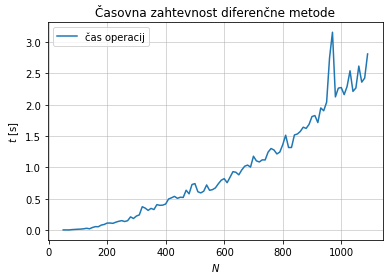

In [15]:
plt.plot(nspace, timer, label='čas operacij')

plt.title('Časovna zahtevnost diferenčne metode')
plt.xlabel('$N$')
plt.ylabel('$t$ [s]')
plt.legend()
plt.grid(alpha=0.5, linewidth=1)
plt.savefig('grafi/timer.pdf')
plt.show()

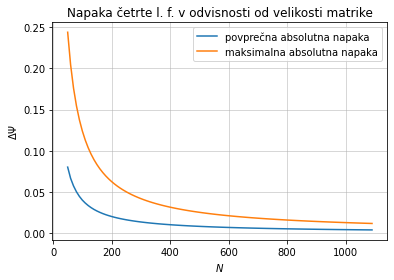

In [16]:
plt.plot(nspace, psi_err[0], label='povprečna absolutna napaka')
plt.plot(nspace, psi_err[1], label='maksimalna absolutna napaka')

plt.title('Napaka četrte l. f. v odvisnosti od velikosti matrike')
plt.xlabel('$N$')
plt.ylabel('$\Delta\Psi$')
plt.legend()
plt.grid(alpha=0.5, linewidth=1)
plt.savefig('grafi/napake.pdf')
plt.show()

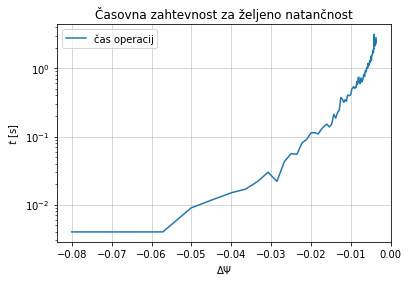

In [17]:
plt.plot(-psi_err[0], timer, label='čas operacij')

plt.title('Časovna zahtevnost za željeno natančnost')
plt.xlabel('$\Delta\Psi$')
plt.ylabel('$t$ [s]')
plt.yscale('log')
plt.legend()
plt.grid(alpha=0.5, linewidth=1)
plt.savefig('grafi/natancnost-cas-log.pdf')
plt.show()

## Končna potencialna jama

 1: z =  1.000e+00, error = -1.085e+06
 2: z = -1.751e+00, error =  3.958e-08
 1: z =  1.000e+00, error = -1.022e+06
 2: z = -1.679e+00, error =  7.215e-10
 1: z =  1.000e+00, error = -9.621e+05
 2: z = -1.606e+00, error = -2.013e-09
 1: z =  1.000e+00, error = -9.040e+05
 2: z = -1.531e+00, error =  7.136e-10
 1: z =  1.000e+00, error = -8.481e+05
 2: z = -1.455e+00, error =  1.566e-09
 1: z =  1.000e+00, error = -7.942e+05
 2: z = -1.378e+00, error = -8.414e-10
 1: z =  1.000e+00, error = -7.424e+05
 2: z = -1.299e+00, error =  1.738e-09
 1: z =  1.000e+00, error = -6.925e+05
 2: z = -1.219e+00, error = -1.703e-09
 1: z =  1.000e+00, error = -6.446e+05
 2: z = -1.137e+00, error =  9.175e-10
 1: z =  1.000e+00, error = -5.985e+05
 2: z = -1.054e+00, error =  5.378e-10
 1: z =  1.000e+00, error = -5.542e+05
 2: z = -9.687e-01, error = -1.503e-09
 1: z =  1.000e+00, error = -5.116e+05
 2: z = -8.819e-01, error =  1.042e-09
 1: z =  1.000e+00, error = -4.707e+05
 2: z = -7.935e-01, error

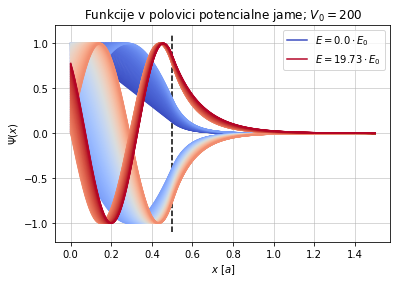

In [24]:
V = 200
N = 1000
xi = -1.5
xf = 1.5
ai = -0.5
af = 0.5
a = af - ai

well = np.array([[xi, ai, ai, af, af, xf], [V, V, 0, 0, V, V]])
x = np.linspace(xi, xf, 2 * N)

def fpw(y, x):
    if abs(x) > af:
        return np.array((y[1], (V - e) * y[0]))
    else:
        return np.array((y[1], -e * y[0]))

def shootfinite_r(energ, x):
    e = energ
    return rp.shoot(fpw, 1., 0., 0., 1., x, 1e-4)



xr = np.linspace(0, xf, 1000)

enspace = np.linspace(0, 150, 400)

colors = cm.coolwarm(np.linspace(0, 1, len(enspace)))
x = np.zeros(2 * len(xr))
y = np.zeros((len(enspace), 2 * len(xr)))
x[:len(xr)] = -xr[::-1]
x[len(xr):] = xr

for i in range(len(enspace)):
    e = enspace[i]
    yr = shootfinite_r(e, xr)
    yr = yr / np.max(np.abs(yr))


    '''if 1: #yr[0] > 0.2:
        y[i, :len(xr)] = yr[::-1]
        y[i, len(xr):] = yr
    else:
        y[i, :len(xr)] = -yr[::-1]
        y[i, len(xr):] = yr'''

    if i == 0 or i == len(enspace)-1:
        plt.plot(xr, yr, color=colors[i], label=f'$E={round(e/7.602534178059353, 2)}\cdot E_0$')
    else:
        plt.plot(xr, yr, color=colors[i])



plt.title(f'Funkcije v polovici potencialne jame; $V_0={V}$')
plt.vlines(af, ymin=-1.1, ymax=1.1, colors='black', linestyles='dashed')
#plt.ylim(-1.1, 1.1)
plt.xlabel('$x$ [$a$]')
plt.ylabel('$\Psi(x)$')
plt.legend()
plt.grid(alpha=0.5, linewidth=1)
plt.savefig('grafi/fwp-halfshootr-V'+str(V)+'-'+str(round(enspace[-1], 0))+'.pdf')
plt.show()

#### Iskanje lastnih funkcij

In [18]:
def shoot( f, a, b, z1, z2, t, tol ):

    from diffeq import rku4

    max_iter = 25

    n = len( t ) 
    prev = []

    y = rku4( f, [a,z1], t )
    prev.append(y[:, 0])
    w1 = y[n-1,0]

    print ("%2d: z = %10.3e, error = %10.3e" % ( 0, z1, b - w1 ))

    for i in range( max_iter ):

        y = rku4( f, [a,z2], t )
        prev.append(y[:, 0])
        w2 = y[n-1,0]

        print ("%2d: z = %10.3e, error = %10.3e" % ( i+1, z2, b - w2 ))


        if abs( b - w2 ) < tol:
            break

        z1, z2 = ( z2, z2 + ( z2 - z1 ) / ( w2 - w1 ) * ( b - w2 ) )
        w1 = w2


    if abs( b - w2 ) >= tol:
        print ("\a**** ERROR ****")
        print ("Maximum number of iterations (%d) exceeded" % max_iter)
        print ("Returned values may not have desired accuracy")
        print ("Error estimate of returned solution is %e" % ( b - w2 ))

    return prev, z2

In [19]:
N = 1000
xi = -1.5
xf = 1.5
ai = -0.5
af = 0.5

enrgf = np.linspace(0, 150, 3000)


def err_finite_r(energf, x):
    e = energf
    prev, z2 = shoot(fpw, 1., 0., 0., 1., x, 1e-4)
    return z2

xr = np.linspace(0, xf, 500)


errf = np.zeros(len(enrgf))
valf = []

for i in range(len(enrgf)):
    e = enrgf[i]
    errf[i] = err_finite_r(e, xr)

    if errf[i] * errf[i-1] < 0:
        valf.append(e)

 0: z =  0.000e+00, error = -1.049e+05
 1: z =  1.000e+00, error = -1.658e+05
 2: z = -1.721e+00, error =  1.945e-09
 0: z =  0.000e+00, error = -1.038e+05
 1: z =  1.000e+00, error = -1.644e+05
 2: z = -1.711e+00, error = -1.663e-10
 0: z =  0.000e+00, error = -1.027e+05
 1: z =  1.000e+00, error = -1.631e+05
 2: z = -1.701e+00, error =  1.893e-10
 0: z =  0.000e+00, error = -1.016e+05
 1: z =  1.000e+00, error = -1.617e+05
 2: z = -1.692e+00, error = -6.093e-11
 0: z =  0.000e+00, error = -1.006e+05
 1: z =  1.000e+00, error = -1.604e+05
 2: z = -1.682e+00, error =  3.056e-10
 0: z =  0.000e+00, error = -9.953e+04
 1: z =  1.000e+00, error = -1.591e+05
 2: z = -1.672e+00, error =  4.401e-10
 0: z =  0.000e+00, error = -9.848e+04
 1: z =  1.000e+00, error = -1.577e+05
 2: z = -1.662e+00, error =  3.193e-10
 0: z =  0.000e+00, error = -9.744e+04
 1: z =  1.000e+00, error = -1.564e+05
 2: z = -1.652e+00, error =  1.170e-10
 0: z =  0.000e+00, error = -9.640e+04
 1: z =  1.000e+00, error

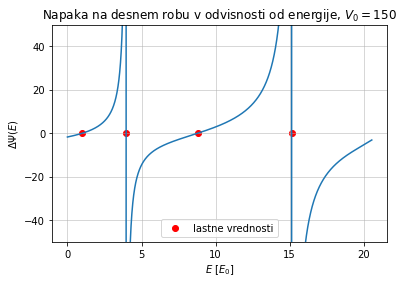

Lastne vrednosti: [7.302434144714906, 28.95965321773925, 64.12137379126376, 110.53684561520508]
Lastne vrednosti: [ 1.          3.96575342  8.78082192 15.1369863 ]


In [20]:
plt.plot(enrgf/valf[0], errf)
plt.scatter(valf/valf[0], np.zeros(len(valf)), color='red', label='lastne vrednosti')

plt.ylim(-50, 50)
plt.title(f'Napaka na desnem robu v odvisnosti od energije, $V_0={V}$')
plt.xlabel('$E$ [$E_0$]')
plt.ylabel('$\Delta\Psi(E)$')
plt.legend()
plt.grid(alpha=0.5, linewidth=1)
plt.savefig(f'grafi/eigenval-f-{V}.pdf')
plt.show()

print(f'Lastne vrednosti: {valf}')
print(f'Lastne vrednosti: {valf/valf[0]}')

#### Lastne funkcije končne jame

 1: z =  1.000e+00, error = -2.888e+04
 2: z =  9.473e-03, error = -1.633e-11
1.0
 1: z =  1.000e+00, error =  3.333e+04
 2: z = -9.990e+02, error = -3.675e-09
1.991419951857853
 1: z =  1.000e+00, error =  8.293e+02
 2: z =  4.827e-02, error =  4.785e-12
2.9632451666725483
 1: z =  1.000e+00, error = -5.210e+02
 2: z = -1.239e+03, error = -1.048e-09
3.8906280086086182


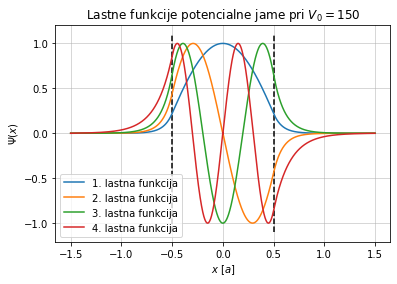

1.0
3.97
8.78
15.14


In [21]:
N = 1000
xi = -1.5
xf = 1.5
ai = -0.5
af = 0.5

valf = valf[:4]

xr = np.linspace(0, xf, 1000)

x = np.zeros(2 * len(xr))
y = np.zeros((len(valf), 2 * len(xr)))
x[:len(xr)] = -xr[::-1]
x[len(xr):] = xr
xl = -xr[::-1]

for i in range(len(valf)):
    e = valf[i]
    yr = shootfinite_r(e, xr)
    yr = yr / np.max(np.abs(yr))

    if yr[0] > 0.2:
        y[i, :len(xr)] = yr[::-1]
        y[i, len(xr):] = yr
    else:
        y[i, :len(xr)] = -yr[::-1]
        y[i, len(xr):] = yr

    if y[i, 1] < 0:
        y[i] = -y[i]


    plt.plot(x, y[i], label=f'{i+1}. lastna funkcija')

    print(np.sqrt(valf[i]/valf[0]))
    
plt.title(f'Lastne funkcije potencialne jame pri $V_0={V}$')
plt.vlines([ai, af], -1.1, 1.1, colors='black', linestyle='dashed')
plt.xlabel('$x$ [$a$]')
plt.ylabel('$\Psi(x)$')
plt.legend()
plt.grid(alpha=0.5, linewidth=1)
plt.savefig(f'grafi/eigfunc-fin-V{V}.pdf')
plt.show()

for i in range(len(valf)):
    print(round(valf[i]/valf[0], 2))

 1: z =  1.000e+00, error = -2.888e+04
 2: z =  9.473e-03, error = -1.633e-11
 1: z =  1.000e+00, error =  3.333e+04
 2: z = -9.990e+02, error = -3.675e-09
 1: z =  1.000e+00, error =  8.293e+02
 2: z =  4.827e-02, error =  4.785e-12
 1: z =  1.000e+00, error = -5.210e+02
 2: z = -1.239e+03, error = -1.048e-09


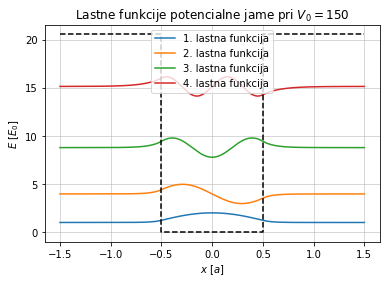

1.0
3.97
8.78
15.14


In [22]:
N = 1000
xi = -1.5
xf = 1.5
ai = -0.5
af = 0.5

valf = valf[:4]

xr = np.linspace(0, xf, 1000)

x = np.zeros(2 * len(xr))
y = np.zeros((len(valf), 2 * len(xr)))
x[:len(xr)] = -xr[::-1]
x[len(xr):] = xr
xl = -xr[::-1]

for i in range(len(valf)):
    e = valf[i]
    yr = shootfinite_r(e, xr)
    yr = yr / np.max(np.abs(yr))

    if yr[0] > 0.2:
        y[i, :len(xr)] = yr[::-1]
        y[i, len(xr):] = yr
    else:
        y[i, :len(xr)] = -yr[::-1]
        y[i, len(xr):] = yr

    if y[i, 1] < 0:
        y[i] = -y[i]


    plt.plot(x, y[i]+valf[i]/valf[0], label=f'{i+1}. lastna funkcija')

    
plt.plot(well[0], well[1]/valf[0], color='black', linestyle='dashed')
plt.title(f'Lastne funkcije potencialne jame pri $V_0={V}$')
#plt.vlines([ai, af], -1.1, 1.1, colors='black', linestyle='dashed')
plt.xlabel('$x$ [$a$]')
plt.ylabel('$E$ [$E_0$]')
plt.legend()
plt.grid(alpha=0.5, linewidth=1)
plt.savefig(f'grafi/vjami-eigfunc-fin-V{V}.pdf')
plt.show()

for i in range(len(valf)):
    print(round(valf[i]/valf[0], 2))

## Dodatna naloga

In [21]:
def difmatplus(N):
    A = np.zeros((N, N))
    for i in range(N):
        for j in range(N):
            if i == j:
                A[i, j] = 6
            elif abs(i - j) == 1:
                A[i, j] = -4
            elif abs(i - j) == 2:
                A[i, j] = 1
    return A

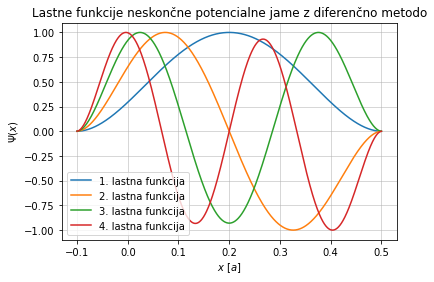

[4.96579907e-10 3.77325130e-09 1.45011392e-08 3.96250833e-08
 8.84230150e-08 1.72488760e-07 3.05734061e-07 5.04387655e-07
 7.86994536e-07 1.17441508e-06 1.68982406e-06 2.35870952e-06
 3.20887160e-06 4.27042116e-06 5.57577837e-06 7.15967113e-06
 9.05913342e-06 1.13135035e-05 1.39644220e-05 1.70558299e-05
 2.06339664e-05 2.47473670e-05 2.94468604e-05 3.47855667e-05
 4.08188948e-05 4.76045393e-05 5.52024779e-05 6.36749687e-05
 7.30865467e-05 8.35040213e-05 9.49964724e-05 1.07635247e-04
 1.21493958e-04 1.36648475e-04 1.53176928e-04 1.71159697e-04
 1.90679413e-04 2.11820951e-04 2.34671427e-04 2.59320192e-04
 2.85858831e-04 3.14381157e-04 3.44983205e-04 3.77763227e-04
 4.12821690e-04 4.50261272e-04 4.90186850e-04 5.32705502e-04
 5.77926500e-04 6.25961302e-04 6.76923550e-04 7.30929061e-04
 7.88095824e-04 8.48543995e-04 9.12395887e-04 9.79775968e-04
 1.05081085e-03 1.12562930e-03 1.20436219e-03 1.28714256e-03
 1.37410553e-03 1.46538837e-03 1.56113045e-03 1.66147322e-03
 1.76656025e-03 1.876537

In [22]:
N = 1000
funcs = 4

A = difmatplus(N)
x = np.linspace(-0.1, 0.5, N)

val, vec = np.linalg.eig(A)
vec = vec[:, np.argsort(val)]

psi = np.zeros((funcs, N))
for i in range(funcs):
    psi[i] = vec[:, i]
    psi[i] = psi[i] / np.max(np.abs(psi[i]))
    
    if psi[i, 1] < 0:
        psi[i] = -psi[i]

    plt.plot(x, psi[i], label=f'{i+1}. lastna funkcija')

plt.title('Lastne funkcije neskončne potencialne jame z diferenčno metodo')
plt.xlabel('$x$ [$a$]')
plt.ylabel('$\Psi(x)$')
plt.legend()
plt.grid(alpha=0.5, linewidth=1)
plt.savefig('grafi/dodatna-'+str(funcs)+'.pdf')
plt.show()

print(np.sort(val))